For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

**Import packages**

Import relevant Python packages. Use train_test_split, LogisticRegression, and various imports from sklearn.metrics to build, visualize, and evalute the model.

In [22]:
### Your code goes here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**
The dataset Invistico_Airline.csv is loaded. The resulting pandas DataFrame is saved as a variable named df_original. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [23]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_original = pd.read_csv("Invistico_Airline.csv")

**Output the first 10 rows**
Output the first 10 rows of data.

In [24]:
### Your code goes here
print(df_original.head(10))

  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   
5    satisfied  Loyal Customer   30  Personal Travel       Eco   
6    satisfied  Loyal Customer   66  Personal Travel       Eco   
7    satisfied  Loyal Customer   10  Personal Travel       Eco   
8    satisfied  Loyal Customer   56  Personal Travel  Business   
9    satisfied  Loyal Customer   22  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                            

**Explore the data**

Check the data type of each column. Note that logistic regression models expect numeric data.

In [25]:
### Your code goes here
print(df_original.dtypes)
print("\nDataset shape:", df_original.shape)
print("\nColumn names:", df_original.columns.tolist())

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

**Check the number of satisfied customers in the dataset**

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

Percentage distribution:
satisfaction
satisfied       54.73283
dissatisfied    45.26717
Name: proportion, dtype: float64


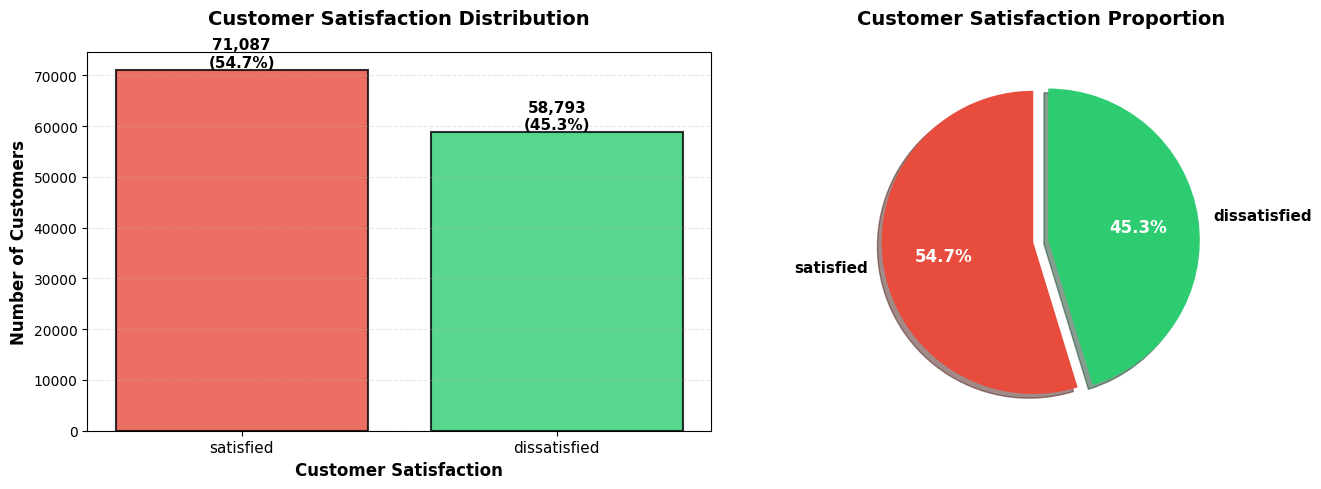


KEY INSIGHTS:
• Total customers analyzed: 129,880
• Satisfied customers: 71,087 (54.7%)
• Dissatisfied customers: 58,793 (45.3%)


In [26]:
### Your code goes here
satisfaction_counts = df_original['satisfaction'].value_counts()
satisfaction_pct = df_original['satisfaction'].value_counts(normalize=True) * 100

print(satisfaction_counts)
print("\nPercentage distribution:")
print(satisfaction_pct)

# Professional Visualization 1: Customer Satisfaction Distribution
plt.figure(figsize=(14, 5))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
colors = ['#e74c3c', '#2ecc71']  # Red for dissatisfied, Green for satisfied
bars = plt.bar(satisfaction_counts.index, satisfaction_counts.values, color=colors, 
               edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}\n({satisfaction_pct.values[i]:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Customer Satisfaction', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Customer Satisfaction Distribution', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
explode = (0.05, 0.05)  # Slightly separate both slices
wedges, texts, autotexts = plt.pie(satisfaction_counts.values, 
                                     labels=satisfaction_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     explode=explode,
                                     startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'},
                                     shadow=True)

# Enhance text visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.title('Customer Satisfaction Proportion', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print(f"• Total customers analyzed: {len(df_original):,}")
print(f"• Satisfied customers: {satisfaction_counts['satisfied']:,} ({satisfaction_pct['satisfied']:.1f}%)")
print(f"• Dissatisfied customers: {satisfaction_counts['dissatisfied']:,} ({satisfaction_pct['dissatisfied']:.1f}%)")
print("="*60)

**Check for missing values**

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [27]:
###your code goes here
print("Missing values per column:")
print(df_original.isnull().sum())
print("\nTotal missing values:", df_original.isnull().sum().sum())

Missing values per column:
satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Total missing values: 393


**Drop the rows with missing values**

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named df_subset.

In [28]:
###Your code goes here
df_subset = df_original.dropna().copy()  # Added .copy() to avoid SettingWithCopyWarning
print("Original shape:", df_original.shape)
print("Shape after dropping missing values:", df_subset.shape)
print("Rows dropped:", df_original.shape[0] - df_subset.shape[0])

Original shape: (129880, 22)
Shape after dropping missing values: (129487, 22)
Rows dropped: 393


**Prepare the data**



Make the Inflight entertainment column "of type float."

Inflight entertainment dtype: float64
Data conversion successful - no warnings!


C:\Users\hp\AppData\Local\Temp\ipykernel_19396\1328197285.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 1].boxplot(data_by_satisfaction, labels=satisfaction_labels,


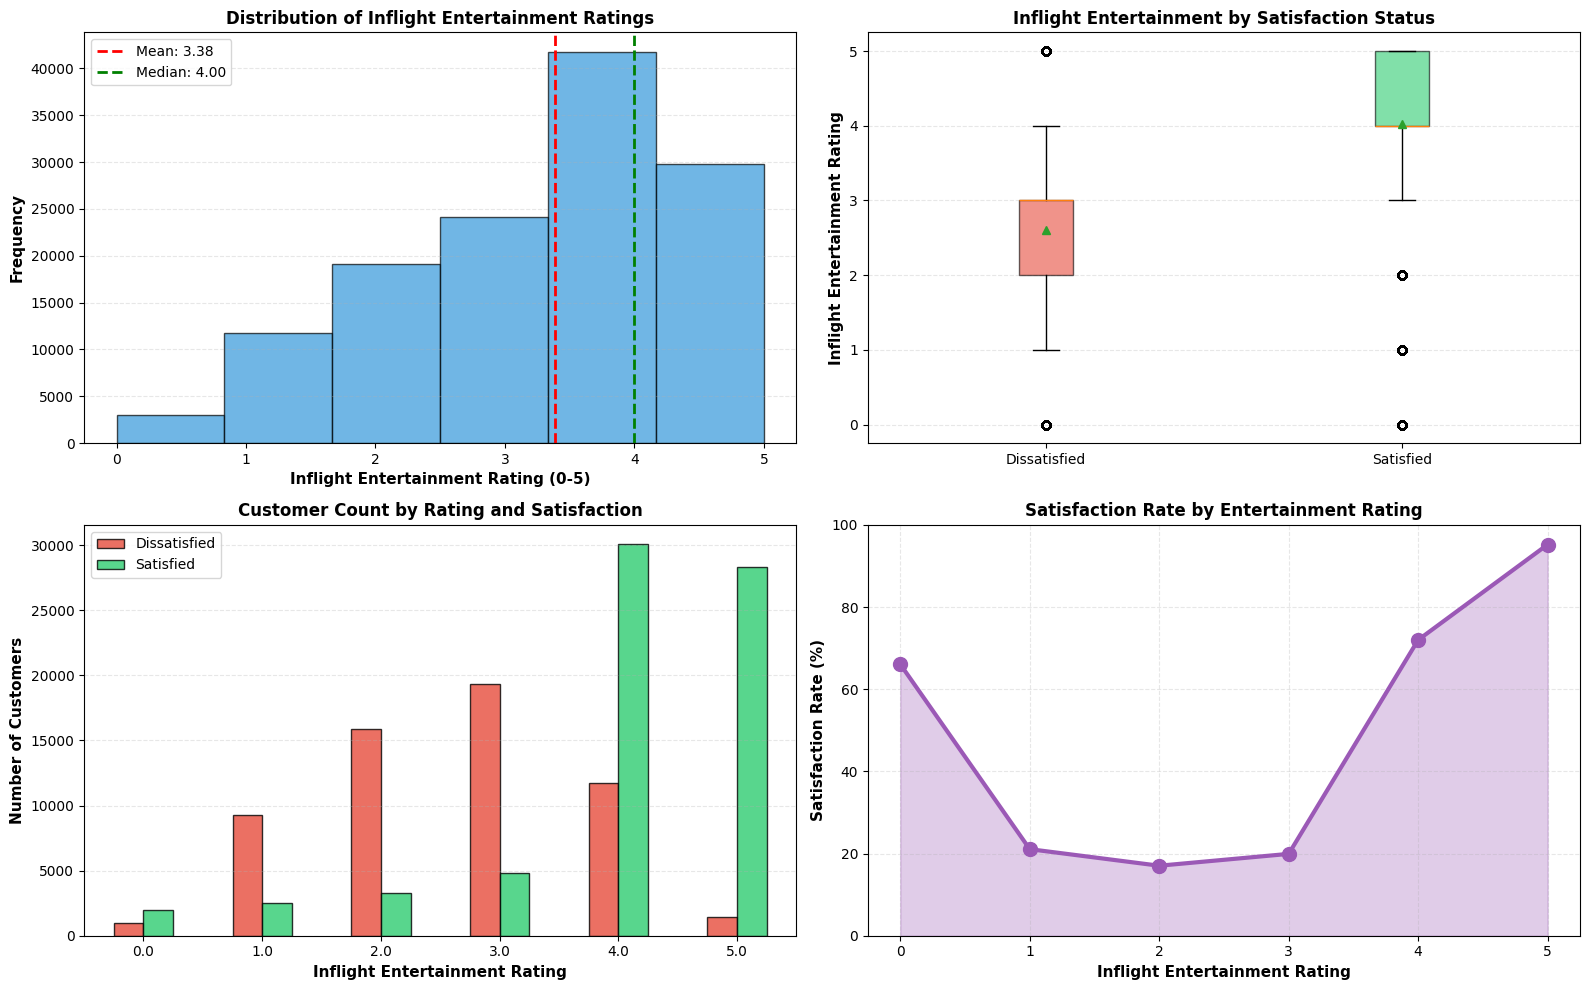


INFLIGHT ENTERTAINMENT ANALYSIS SUMMARY
Overall Statistics:
  • Mean Rating: 3.38
  • Median Rating: 4.00
  • Std Deviation: 1.35

By Satisfaction Status:
  • Dissatisfied customers - Mean Rating: 2.61
  • Satisfied customers - Mean Rating: 4.02


In [29]:
###Your code goes here
df_subset['Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)
print("Inflight entertainment dtype:", df_subset['Inflight entertainment'].dtype)
print("Data conversion successful - no warnings!")

# Professional Visualization 2: Inflight Entertainment Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Distribution of Inflight Entertainment Ratings
axes[0, 0].hist(df_subset['Inflight entertainment'], bins=6, color='#3498db', 
                edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Inflight Entertainment Rating (0-5)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Inflight Entertainment Ratings', 
                     fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')

# Add statistics
mean_rating = df_subset['Inflight entertainment'].mean()
median_rating = df_subset['Inflight entertainment'].median()
axes[0, 0].axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_rating:.2f}')
axes[0, 0].axvline(median_rating, color='green', linestyle='--', linewidth=2, label=f'Median: {median_rating:.2f}')
axes[0, 0].legend()

# Plot 2: Boxplot by Satisfaction Status
satisfaction_labels = ['Dissatisfied', 'Satisfied']
data_by_satisfaction = [
    df_subset[df_subset['satisfaction'] == 'dissatisfied']['Inflight entertainment'],
    df_subset[df_subset['satisfaction'] == 'satisfied']['Inflight entertainment']
]
bp = axes[0, 1].boxplot(data_by_satisfaction, labels=satisfaction_labels, 
                        patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], ['#e74c3c', '#2ecc71']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[0, 1].set_ylabel('Inflight Entertainment Rating', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Inflight Entertainment by Satisfaction Status', 
                     fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

# Plot 3: Count by Rating and Satisfaction
rating_satisfaction = df_subset.groupby(['Inflight entertainment', 'satisfaction']).size().unstack(fill_value=0)
rating_satisfaction.plot(kind='bar', ax=axes[1, 0], color=['#e74c3c', '#2ecc71'], 
                        edgecolor='black', alpha=0.8)
axes[1, 0].set_xlabel('Inflight Entertainment Rating', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Customer Count by Rating and Satisfaction', 
                     fontsize=12, fontweight='bold')
axes[1, 0].legend(['Dissatisfied', 'Satisfied'], loc='upper left')
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot 4: Satisfaction Rate by Rating
rating_satisfaction_pct = df_subset.groupby('Inflight entertainment')['satisfaction'].apply(
    lambda x: (x == 'satisfied').sum() / len(x) * 100
).reset_index(name='Satisfaction Rate (%)')
axes[1, 1].plot(rating_satisfaction_pct['Inflight entertainment'], 
               rating_satisfaction_pct['Satisfaction Rate (%)'], 
               marker='o', linewidth=3, markersize=10, color='#9b59b6')
axes[1, 1].fill_between(rating_satisfaction_pct['Inflight entertainment'], 
                        rating_satisfaction_pct['Satisfaction Rate (%)'], 
                        alpha=0.3, color='#9b59b6')
axes[1, 1].set_xlabel('Inflight Entertainment Rating', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Satisfaction Rate (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Satisfaction Rate by Entertainment Rating', 
                     fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, linestyle='--')
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

# Statistical Summary
print("\n" + "="*70)
print("INFLIGHT ENTERTAINMENT ANALYSIS SUMMARY")
print("="*70)
print(f"Overall Statistics:")
print(f"  • Mean Rating: {df_subset['Inflight entertainment'].mean():.2f}")
print(f"  • Median Rating: {df_subset['Inflight entertainment'].median():.2f}")
print(f"  • Std Deviation: {df_subset['Inflight entertainment'].std():.2f}")
print(f"\nBy Satisfaction Status:")
for status in ['dissatisfied', 'satisfied']:
    mean_val = df_subset[df_subset['satisfaction'] == status]['Inflight entertainment'].mean()
    print(f"  • {status.capitalize()} customers - Mean Rating: {mean_val:.2f}")
print("="*70)

**Convert the categorical column satisfaction into numeric**

Convert the categorical column satisfaction into numeric through one-hot encoding.

In [30]:
###Your code goes here
df_subset = pd.get_dummies(df_subset, columns=['satisfaction'], drop_first=True)
print("Columns after one-hot encoding:")
print(df_subset.columns.tolist())

Columns after one-hot encoding:
['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_satisfied']


**Output the first 10 rows of df_subset**

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of df_subset.

In [31]:
### Your code goes here
print(df_subset.head(10))

    Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Loyal Customer   65  Personal Travel       Eco              265   
1  Loyal Customer   47  Personal Travel  Business             2464   
2  Loyal Customer   15  Personal Travel       Eco             2138   
3  Loyal Customer   60  Personal Travel       Eco              623   
4  Loyal Customer   70  Personal Travel       Eco              354   
5  Loyal Customer   30  Personal Travel       Eco             1894   
6  Loyal Customer   66  Personal Travel       Eco              227   
7  Loyal Customer   10  Personal Travel       Eco             1812   
8  Loyal Customer   56  Personal Travel  Business               73   
9  Loyal Customer   22  Personal Travel       Eco             1556   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             0                                  0               0   
1             0                                  0               0   
2             0    

**Create the training and testing data**

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [32]:
### Your code goes here
# Separate features (X) and target (y)
X = df_subset[['Inflight entertainment']]
y = df_subset['satisfaction_satisfied']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Feature(s):", X.columns.tolist())
print("Target variable: satisfaction_satisfied")

Training set size: 90640
Testing set size: 38847
Feature(s): ['Inflight entertainment']
Target variable: satisfaction_satisfied


**Fit a LogisticRegression model to the data**

Build a logistic regression model and fit the model to the training data.

In [33]:
###your code goes here
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


**Obtain parameter estimates**

Make sure you output the two parameters from your model.

In [34]:
### Output the coefficient
print("Coefficient (Inflight entertainment):", clf.coef_[0][0])


Coefficient (Inflight entertainment): 0.997528828581138


In [35]:
###output the intrcept
print("Intercept:", clf.intercept_[0])

Intercept: -3.1935905423025908


**Predict the outcome for the test dataset**

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the predict function to get the predicted labels from the model. Save these predictions as a variable called y_pred.

In [36]:
###Your code goes here
y_pred = clf.predict(X_test)
print("Predictions generated for test set")
print("Sample predictions:", y_pred[:10])

Predictions generated for test set
Sample predictions: [ True False False  True  True False  True False  True  True]


**Print out y_pred** 

In order to examine the predictions, print out y_pred.

In [37]:
###Your code goes here
print("All predictions:")
print(y_pred)
print("\nPrediction distribution:")
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

All predictions:
[ True False False ... False False False]

Prediction distribution:
{np.False_: np.int64(17499), np.True_: np.int64(21348)}


Use the predict_proba and predict functions on X_test¶

Probability predictions (first 10 rows):
Format: [P(dissatisfied), P(satisfied)]
[[0.14257646 0.85742354]
 [0.55008251 0.44991749]
 [0.89989529 0.10010471]
 [0.31076939 0.68923061]
 [0.31076939 0.68923061]
 [0.55008251 0.44991749]
 [0.14257646 0.85742354]
 [0.76826369 0.23173631]
 [0.31076939 0.68923061]
 [0.31076939 0.68923061]]

Class predictions (first 10): [ True False False  True  True False  True False  True  True]


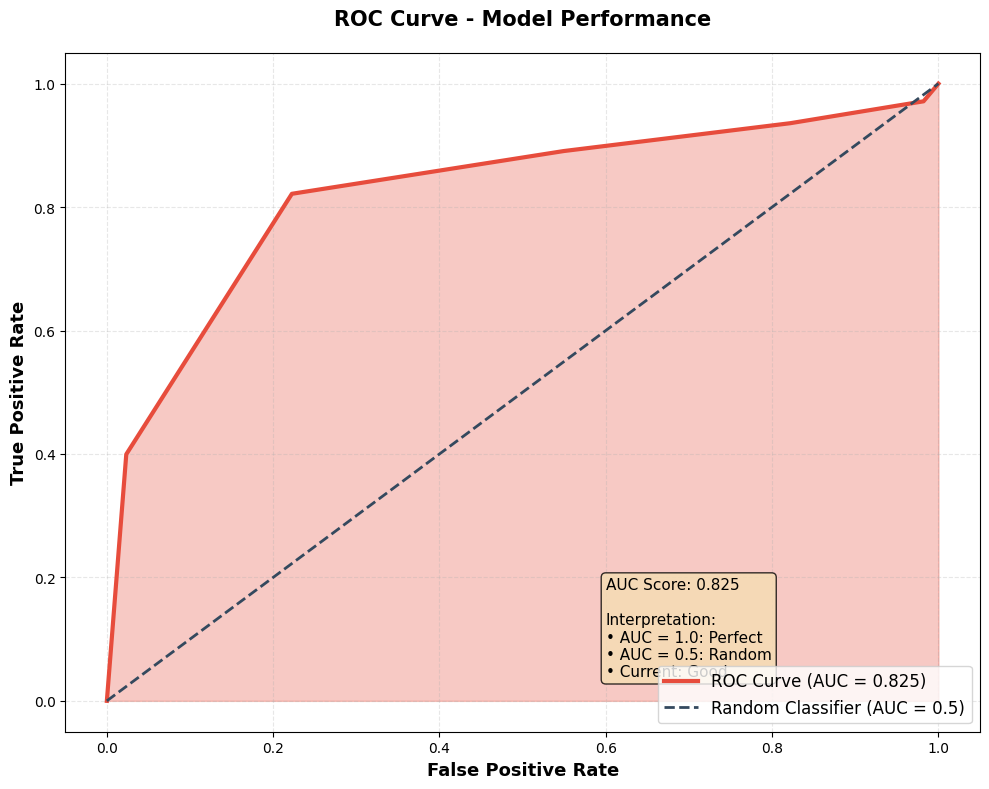


ROC-AUC ANALYSIS
AUC Score: 0.8254
Interpretation: The model has good discriminative ability


In [38]:
###Your code goes here
# Get probability predictions
y_pred_proba = clf.predict_proba(X_test)
print("Probability predictions (first 10 rows):")
print("Format: [P(dissatisfied), P(satisfied)]")
print(y_pred_proba[:10])

# Get class predictions
y_pred_class = clf.predict(X_test)
print("\nClass predictions (first 10):", y_pred_class[:10])

# Professional Visualization: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#e74c3c', linewidth=3, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='#34495e', linestyle='--', linewidth=2, label='Random Classifier (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.3, color='#e74c3c')

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ROC Curve - Model Performance', fontsize=15, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# Add text box with interpretation
textstr = f'AUC Score: {roc_auc:.3f}\n\nInterpretation:\n• AUC = 1.0: Perfect\n• AUC = 0.5: Random\n• Current: {"Excellent" if roc_auc > 0.9 else "Good" if roc_auc > 0.8 else "Fair" if roc_auc > 0.7 else "Poor"}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.6, 0.2, textstr, fontsize=11, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ROC-AUC ANALYSIS")
print("="*70)
print(f"AUC Score: {roc_auc:.4f}")
print(f"Interpretation: The model has {'excellent' if roc_auc > 0.9 else 'good' if roc_auc > 0.8 else 'fair' if roc_auc > 0.7 else 'poor'} discriminative ability")
print("="*70)

***Analyze the results***

Print out the model's accuracy, precision, recall, and F1 score.

Model Performance Metrics:
Accuracy:  0.8015
Precision: 0.8161
Recall:    0.8215
F1 Score:  0.8188

Detailed Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.78      0.78      0.78     17639
   Satisfied       0.82      0.82      0.82     21208

    accuracy                           0.80     38847
   macro avg       0.80      0.80      0.80     38847
weighted avg       0.80      0.80      0.80     38847



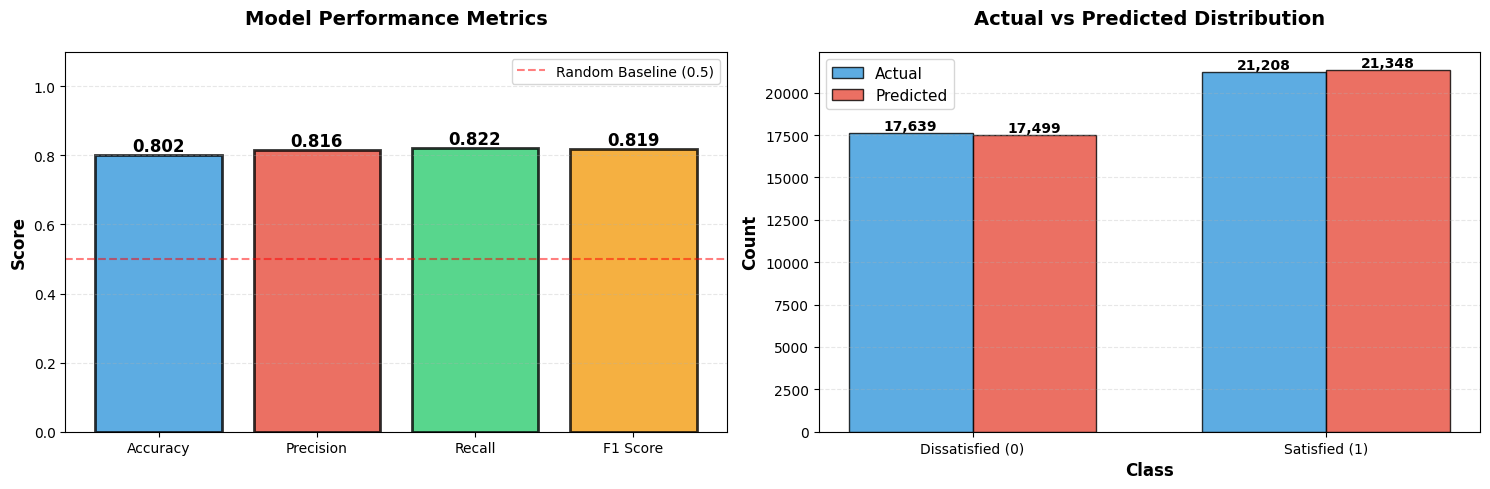


MODEL PERFORMANCE INTERPRETATION
✓ Accuracy (80.2%): Overall correctness of predictions
✓ Precision (81.6%): Of predicted satisfied, 81.6% are actually satisfied
✓ Recall (82.2%): Of actual satisfied, 82.2% were correctly identified
✓ F1 Score (0.819): Harmonic mean of precision and recall


In [39]:
###Your code goes here
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance Metrics:")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("=" * 40)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied']))

# Professional Visualization 3: Model Performance Metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Performance Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
colors_metrics = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = axes[0].bar(metrics, values, color=colors_metrics, edgecolor='black', 
                   linewidth=2, alpha=0.8)
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Model Performance Metrics', fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylim(0, 1.1)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, values)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.3f}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add reference line at 0.5
axes[0].axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='Random Baseline (0.5)')
axes[0].legend()

# Plot 2: Prediction Distribution
pred_dist = pd.Series(y_pred).value_counts().sort_index()
actual_dist = pd.Series(y_test).value_counts().sort_index()

x = np.arange(2)
width = 0.35

bars1 = axes[1].bar(x - width/2, actual_dist.values, width, label='Actual', 
                    color='#3498db', edgecolor='black', alpha=0.8)
bars2 = axes[1].bar(x + width/2, pred_dist.values, width, label='Predicted', 
                    color='#e74c3c', edgecolor='black', alpha=0.8)

axes[1].set_xlabel('Class', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Actual vs Predicted Distribution', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Dissatisfied (0)', 'Satisfied (1)'])
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Model Interpretation
print("\n" + "="*70)
print("MODEL PERFORMANCE INTERPRETATION")
print("="*70)
print(f"✓ Accuracy ({accuracy:.1%}): Overall correctness of predictions")
print(f"✓ Precision ({precision:.1%}): Of predicted satisfied, {precision:.1%} are actually satisfied")
print(f"✓ Recall ({recall:.1%}): Of actual satisfied, {recall:.1%} were correctly identified")
print(f"✓ F1 Score ({f1:.3f}): Harmonic mean of precision and recall")
print("="*70)

**Produce a confusion matrix**

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

Confusion Matrix:
[[13714  3925]
 [ 3785 17423]]


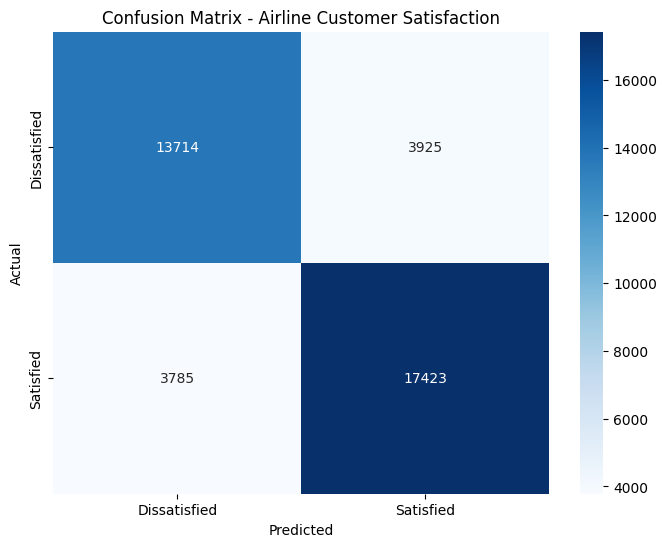


Confusion Matrix Breakdown:
True Negatives (TN):  13714 - Correctly predicted dissatisfied
False Positives (FP): 3925 - Incorrectly predicted satisfied
False Negatives (FN): 3785 - Incorrectly predicted dissatisfied
True Positives (TP):  17423 - Correctly predicted satisfied


In [40]:
###Your code goes here
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Airline Customer Satisfaction')
plt.show()

# Additional interpretation
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {cm[0][0]} - Correctly predicted dissatisfied")
print(f"False Positives (FP): {cm[0][1]} - Incorrectly predicted satisfied")
print(f"False Negatives (FN): {cm[1][0]} - Incorrectly predicted dissatisfied")
print(f"True Positives (TP):  {cm[1][1]} - Correctly predicted satisfied")